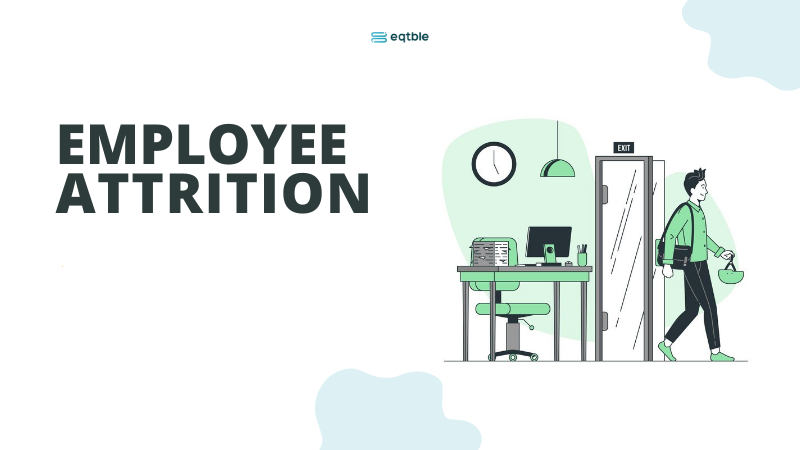
**Employee attrition occurs when there is a decrease in the number of employees working for an organizaton as a result of them leaving without replacement.**

# **TABLE OF CONTENT**



1.   DATA DESCRIPTION
2.   ARTILLERIES
> 2.0 IMPORT LIBRARIES<br> 2.1 LOAD DATA SET 
3. EXPLORATORY DATA ANALYSIS
> 3.1 DATA CLEANING<BR> 3.2 DATA VISUALIZATION<BR>


## 1.1 **DATA DESCRIPTION**

In this Dataset, we have various information about why employees exit company. Some of the key features of the dataset includes - Attrition, Education, HourlyRate, JobInvolvement, JobLevel, JobRole, MonthlyIncome, PercentSalaryHike, StockOptionLevel, WorkLifeBalance.

Dataset Glossary (Column-wise)

* id - Employee id
* Age - Employee Age
* Attrition - If employees exit or not
* BusinessTravel - Employee travel rate
* DailyRate - 
* Department - Employee individual departments
* DistanceFromHome - Distance from office to home
* Education - Educational level
* EducationField - Field of Study
* EmployeeCount - Number of Employee
* EmployeeNumber - Employee unique numbers
* EnvironmentSatisfaction
* Gender - male or female
* HourlyRate - amount paid hourly
* JobInvolvement - rate at which employee is involved in his/her role
* JobLevel - Employee level at the job
* JobRole - Employee role at the job
* JobSatisfaction - Employee statisfcation rate
* MaritalStatus - Employee is married, single or divorce
* MonthlyIncome - Employee monthly Salary
* MonthlyRate - Employee monthly rate
* NumCompaniesWorked - Number of companies worked in the past
* Over18 - Employee above 18yrs of age
* OverTime - Employee who worked overtime
* PercentSalaryHike - Percentage Salary increace
* PerformanceRating - Employee performance rating
* RelationshipSatisfaction - Employee satisfaction
* StandardHours - Standard working hours
* StockOptionLevel - Employees stock option
* TotalWorkingYears - Employee total years of working experience
* TrainingTimesLastYear - Number of times where trained previous year
* WorkLifeBalance - Employee work and life balance 
* YearsAtCompany - Number of years employee has spent in the company
* YearsInCurrentRole - Number of years employee has been in current role
* YearsSinceLastPromotion - Number of years since last promotion
* YearsWithCurrManager - Number of years with current manager

## 2.0  **IMPORT LIBRARIES**

In [1]:
#import necessaries libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Built-in library
import itertools
import re
import json
import typing as tp

#pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000

In [3]:
#import libraries
import sqlite3
from typing import List, Tuple, Dict, Union

# 2.1 **LOAD DATASET**

In [4]:
%load_ext sql

In [5]:
%%sql

sqlite:///attr_data.db 

'Connected: @attr_data.db'

In [6]:
%%sql

SELECT name FROM sqlite_master;

 * sqlite:///attr_data.db
Done.


name
attrition_records
sqlite_sequence


In [7]:
%%sql

SELECT * FROM attrition_records
LIMIT 10;

 * sqlite:///attr_data.db
Done.


id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
6,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
7,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
8,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
9,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
10,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


## Creating CSV file using SQLite

In [8]:
filepath = "attr_data.db" #create a filepath for the database
conn = sqlite3.connect(filepath) #create a connection to the database

cursor = conn.cursor()

In [9]:
def create_table(sql_query: str):
    """This is used to create a table"""
    
    with conn:
        result = cursor.execute(sql_query) #Execute
        conn.commit() #commit/save change
        print("Table has been created")
    return cursor

In [10]:
def show_all_tables():
    """This is used to show all the created table in the database"""
    
    with conn:
        sql_query = "SELECT name FROM sqlite_master"
        result = cursor.execute(sql_query) #Execute
        conn.commit() #commit/save change
    return result.fetchall() #return all the data

In [11]:
def show_all_values_in_table(table_name: str):
    """This is used to select all the values in a table"""
    sql_query = f"SELECT * FROM {table_name}"
    
    with conn:
        result = cursor.execute(sql_query) #Execute
        print(f"The '{table_name}' table contains: ")
    return result.fetchall() #return all the data

In [12]:
def show_all_columns(table_name: str):
    """This is used to show all the columns in a table"""
    sql_query = f"SELECT name FROM PRAGMA_TABLE_INFO('{table_name}')"
    
    with conn:
        result = cursor.execute(sql_query) #Execute
        print(f"The '{table_name}' table contains: ")
    return result.fetchall() #return all the data

In [13]:
def select_query(sql_query: str):
    
    with conn:
        result = cursor.execute(sql_query) #Execute
        print(f"===== Query results =====")
    return result.fetchall() #return all the data

In [14]:
sql_query = """
    SELECT * FROM attrition_records;
"""
result=select_query(sql_query)
result

===== Query results =====


[(1,
  41,
  'Yes',
  'Travel_Rarely',
  1102,
  'Sales',
  1,
  2,
  'Life Sciences',
  1,
  1,
  2,
  'Female',
  94,
  3,
  2,
  'Sales Executive',
  4,
  'Single',
  5993,
  19479,
  8,
  'Y',
  'Yes',
  11,
  3,
  1,
  80,
  0,
  8,
  0,
  1,
  6,
  4,
  0,
  5),
 (2,
  49,
  'No',
  'Travel_Frequently',
  279,
  'Research & Development',
  8,
  1,
  'Life Sciences',
  1,
  2,
  3,
  'Male',
  61,
  2,
  2,
  'Research Scientist',
  2,
  'Married',
  5130,
  24907,
  1,
  'Y',
  'No',
  23,
  4,
  4,
  80,
  1,
  10,
  3,
  3,
  10,
  7,
  1,
  7),
 (3,
  37,
  'Yes',
  'Travel_Rarely',
  1373,
  'Research & Development',
  2,
  2,
  'Other',
  1,
  4,
  4,
  'Male',
  92,
  2,
  1,
  'Laboratory Technician',
  3,
  'Single',
  2090,
  2396,
  6,
  'Y',
  'Yes',
  15,
  3,
  2,
  80,
  0,
  7,
  3,
  3,
  0,
  0,
  0,
  0),
 (4,
  33,
  'No',
  'Travel_Frequently',
  1392,
  'Research & Development',
  3,
  4,
  'Life Sciences',
  1,
  5,
  4,
  'Female',
  56,
  3,
  1,
  'Resear

In [15]:
%%sql

SELECT * FROM attrition_records
LIMIT 2;

 * sqlite:///attr_data.db
Done.


id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7


In [16]:
df = pd.DataFrame(
    data=result, columns = ["id", "Age", "Attrition", "BusinessTravel", "DailyRate", "Department","DistanceFromHome",
                           "Education", "EducationField", "EmployeeCount", "EmployeeNumber", "EnvironmentSatisfaction",
                           "Gender", "HourlyRate", "JobInvolvement", "JobLevel","JobRole", "JobSatisfaction", "MaritalStatus",
                            "MonthlyIncome", "MonthlyRate", "NumCompaniesWorked", "Over18", "OverTime", "PercentSalaryHike",
                           "PerformanceRating", "RelationshipSatisfaction", "StandardHours", "StockOptionLevel",
                            "TotalWorkingYears", "TrainingTimesLastYear", "WorkLifeBalance", "YearsAtCompany","YearsInCurrentRole",
                           "YearsSinceLastPromotion", "YearsWithCurrManager"])


#converting "df" to csv file

df.to_csv("attrition.csv", index = False)
df


,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,1467,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,1468,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,1469,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [17]:
conn.close() #close the connection

In [18]:
#read csv file

df_attr= pd.read_csv(r'C:\Users\abose\Desktop\DSCI\Project\attrition.csv')
df_attr.head()

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# 3.0 **EXPLORATORY DATA ANALYSIS**

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.


## 3.1 **Data Cleaning**

In [19]:
df.shape #rows and columns of the dataframe

(1470, 36)

The Dataset used has 1470 rows and 36 columns

In [20]:
df.info() #gives more information about the dataframe such as columns, data type, count of null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Attrition                 1470 non-null   object
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeeCount             1470 non-null   int64 
 10  EmployeeNumber            1470 non-null   int64 
 11  EnvironmentSatisfaction   1470 non-null   int64 
 12  Gender                    1470 non-null   object
 13  HourlyRate                1470 non-null   int64 
 14  JobInvolvement          

In [21]:
df.columns #columns in the dataframe

Index(['id', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [22]:
df.describe() #gives statistics of the dataframe

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [23]:
df.isna().sum() #checks for the total null values

id                          0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCur

In [24]:
df.kurtosis() #check for outliers

id                         -1.200000
Age                        -0.404145
DailyRate                  -1.203823
DistanceFromHome           -0.224833
Education                  -0.559115
EmployeeCount               0.000000
EmployeeNumber             -1.223179
EnvironmentSatisfaction    -1.202521
HourlyRate                 -1.196398
JobInvolvement              0.270999
JobLevel                    0.399152
JobSatisfaction            -1.222193
MonthlyIncome               1.005233
MonthlyRate                -1.214956
NumCompaniesWorked          0.010214
PercentSalaryHike          -0.300598
PerformanceRating           1.695939
RelationshipSatisfaction   -1.184814
StandardHours               0.000000
StockOptionLevel            0.364634
TotalWorkingYears           0.918270
TrainingTimesLastYear       0.494993
WorkLifeBalance             0.419460
YearsAtCompany              3.935509
YearsInCurrentRole          0.477421
YearsSinceLastPromotion     3.612673
YearsWithCurrManager        0.171058
d

In [25]:
df.skew()

id                          0.000000
Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
d

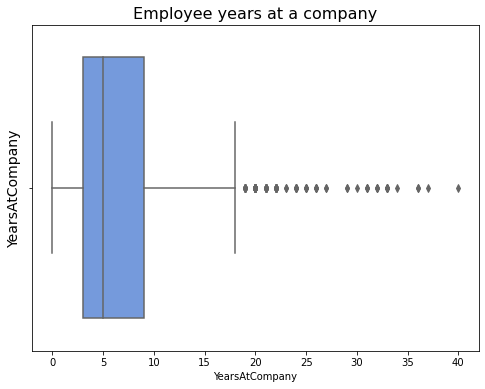

In [26]:
#Box plot for "YearsAtCompany" column 
plt.figure(figsize = (8, 6))
sns.boxplot(x=df["YearsAtCompany"], color = "cornflowerblue") 
plt.ylabel("YearsAtCompany", size = 14)
plt.title("Employee years at a company", size = 16)
plt.show()

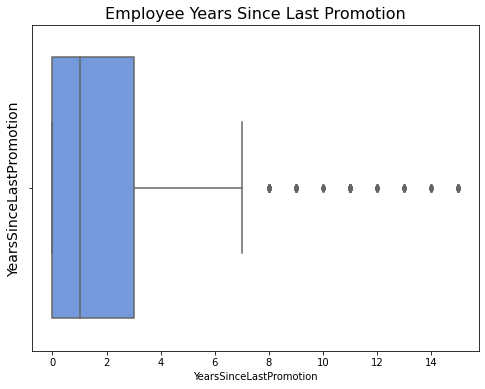

In [27]:
#Box plot for "Years Since Last Promotion" column 
plt.figure(figsize = (8, 6))
sns.boxplot(x=df["YearsSinceLastPromotion"], color = "cornflowerblue") 
plt.ylabel("YearsSinceLastPromotion", size = 14)
plt.title("Employee Years Since Last Promotion", size = 16)
plt.show()

In [28]:
#make a copy of the dataframe
df_1 = df.copy()
df_1

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,1467,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,1468,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,1469,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [29]:
#split into numerical and categorical data

numerical_data = [var for var in df_1.columns if df_1[var].dtype != 'O']
categorical_data = [var for var in df_1.columns if df_1[var].dtype =="O"]

numerical_data, categorical_data

(['id',
  'Age',
  'DailyRate',
  'DistanceFromHome',
  'Education',
  'EmployeeCount',
  'EmployeeNumber',
  'EnvironmentSatisfaction',
  'HourlyRate',
  'JobInvolvement',
  'JobLevel',
  'JobSatisfaction',
  'MonthlyIncome',
  'MonthlyRate',
  'NumCompaniesWorked',
  'PercentSalaryHike',
  'PerformanceRating',
  'RelationshipSatisfaction',
  'StandardHours',
  'StockOptionLevel',
  'TotalWorkingYears',
  'TrainingTimesLastYear',
  'WorkLifeBalance',
  'YearsAtCompany',
  'YearsInCurrentRole',
  'YearsSinceLastPromotion',
  'YearsWithCurrManager'],
 ['Attrition',
  'BusinessTravel',
  'Department',
  'EducationField',
  'Gender',
  'JobRole',
  'MaritalStatus',
  'Over18',
  'OverTime'])

In [30]:
#drop duplicate values
drop_duplicate = df_1.drop_duplicates(inplace = True)
df_1

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,1467,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,1468,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,1469,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


Dropping Some Unimportant Columns

In [31]:
drop_columns = df_1.drop(['Over18'], axis = 1, inplace = True)

In [32]:
drop_StandardHours = df_1.drop(['StandardHours'], axis = 1, inplace = True)

In [33]:
df_1

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3
1466,1467,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7
1467,1468,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,1469,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8


Checking for unique values in BusinessTravel

In [34]:
df_1.BusinessTravel.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

Checking for unique values in Department

In [35]:
df_1.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

Checking for unique values in EducationField

In [36]:
df_1.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

Checking for unique values in JobRole

In [37]:
df_1.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

Checking for unique values in MaritalStatus

In [38]:
df_1.MaritalStatus.unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

Converting Job Roles into 5 Categories

In [39]:
director =["Manufacturing Director", "Research Director"]
executive = ["Sales Executive"]
Manager = ["Manager"]
Representative = ["Healthcare Representative", "Sales Representative"]
employee = ["Human Resources", "Laboratory Technician", "Research Scientist"]

In [40]:
def JobRole(Job_title):
    if Job_title in director:
        return "director"
    if Job_title in executive:
        return "executive"
    if Job_title in Manager:
        return "Manager"
    if Job_title in Representative:
        return "Representative"
    if Job_title in employee:
        return "employee"
    
df_1["JobRole"] = df_1["JobRole"].map(JobRole)

Checking unique values for JobRoles after reducing the data

In [41]:
df_1["JobRole"].unique()

array(['executive', 'employee', 'director', 'Representative', 'Manager'],
      dtype=object)

Dataset after mapping the values

In [42]:
df_1.head(5)

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,employee,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,employee,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,employee,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,employee,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


## 3.2 **Visualization**

Checking for attrition

In [43]:
df_1["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

C:\Users\abose\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Attrition')

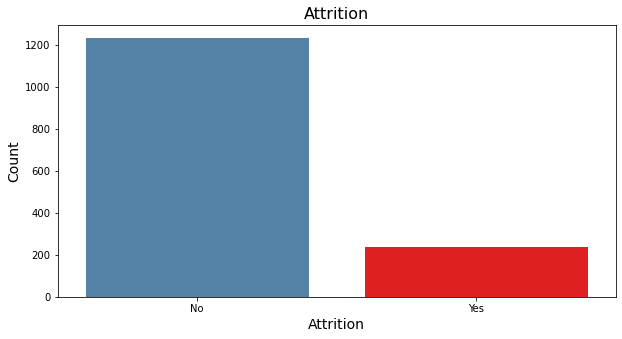

In [44]:
attrition = df_1.Attrition.value_counts()#counts the values in attrition column
plt.figure(figsize=(10, 5))#plot size
sns.barplot(attrition.index, attrition, palette = ["steelblue", "red", ]);#creating a barplot
plt.xlabel('Attrition', size=14);#x label
plt.ylabel('Count', size=14)#y label
plt.title("Attrition", size = 16)

Distribution of Age based on Attrition

Text(0.5, 1.0, 'Distribution of Age based on Attrition')

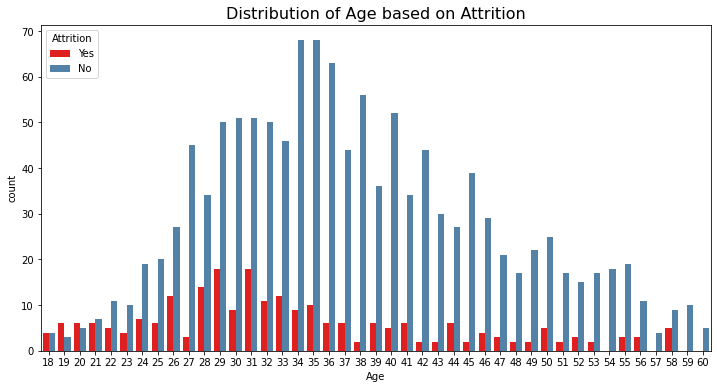

In [45]:
plt.figure(figsize=(12, 6)) #plot size
sns.countplot(x="Age", hue="Attrition", data=df_1, palette = ["red", "steelblue"])#create countplot
plt.title("Distribution of Age based on Attrition", size = 16)#title of plot

Distribution of BusinessTravel based on Attrition

Text(0.5, 1.0, 'Distribution of Business Travel with respect to Attrition')

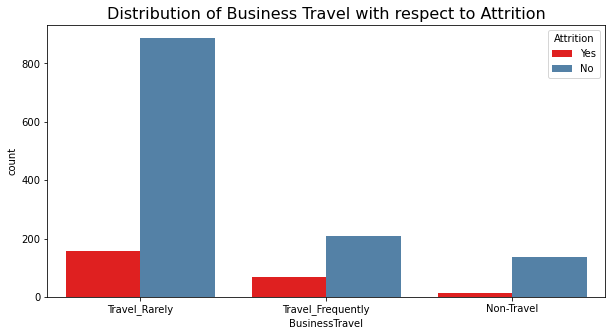

In [46]:
plt.figure(figsize=(10, 5))#plot size
sns.countplot(x="BusinessTravel", hue="Attrition", data=df_1, palette = ["red", "steelblue"])#create countplot
plt.title("Distribution of Business Travel with respect to Attrition", size = 16)#title of plo

Distribution of Department based on Attrition

Text(0.5, 1.0, 'Distribution of Department with respect to Attrition')

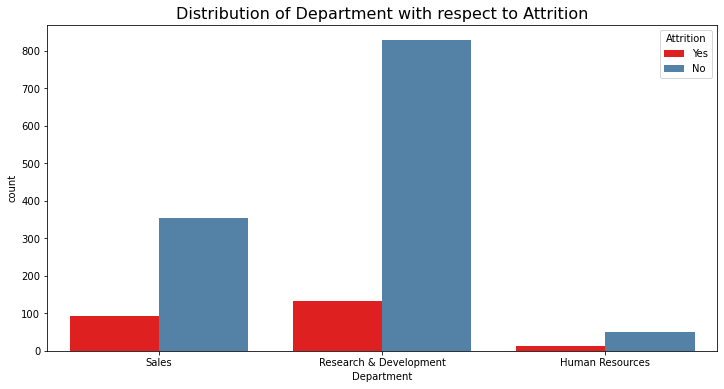

In [47]:
plt.figure(figsize=(12, 6))#plot size
sns.countplot(x="Department", hue="Attrition", data=df_1, palette = ["red", "steelblue"])#create countplot
plt.title("Distribution of Department with respect to Attrition", size = 16)#title of plot

Distribution of Age based on Attrition

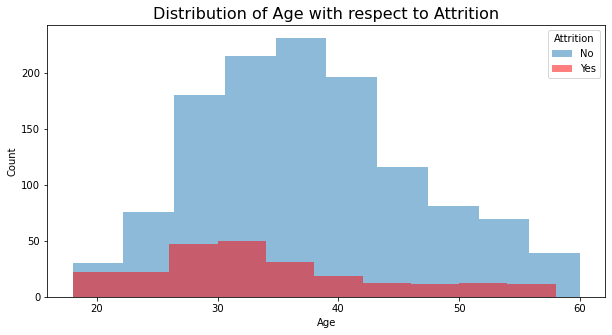

In [48]:
plt.figure(figsize=(10, 5))#plot size
plt.hist("Age", data = df_1[df_1["Attrition"] == "No"], alpha = 0.5, label = "No")#create histogram plot
plt.hist("Age", data = df_1[df_1["Attrition"] == "Yes"], alpha = 0.5, label = "Yes", color = "Red")#create histogram plot
plt.title("Distribution of Age with respect to Attrition", size = 16)#title of plot
plt.xlabel("Age")#x label
plt.ylabel("Count")#y label
plt.legend(title = "Attrition")#legend
plt.show()


Distribution of Distance from home based on Attrition

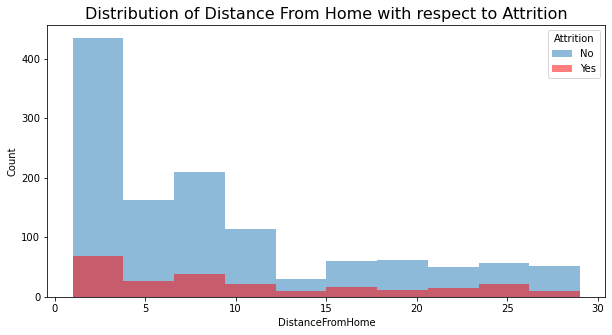

In [49]:
plt.figure(figsize=(10, 5))#plot size
plt.hist("DistanceFromHome", data = df_1[df_1["Attrition"] == "No"], alpha = 0.5, label = "No")#create histogram plot
plt.hist("DistanceFromHome", data = df_1[df_1["Attrition"] == "Yes"], alpha = 0.5, label = "Yes", color = "Red")#create histogram plot
plt.title("Distribution of Distance From Home with respect to Attrition", size = 16)#title of plot
plt.xlabel("DistanceFromHome")#x label
plt.ylabel("Count")#y label
plt.legend(title = "Attrition")#legend
plt.show()

Distribution of Education based on Attrition 

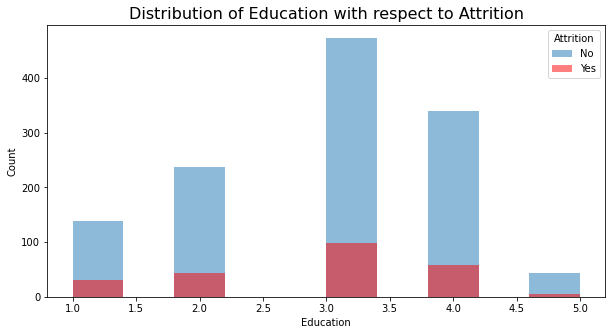

In [50]:
plt.figure(figsize=(10, 5))#plot size
plt.hist("Education", data = df_1[df_1["Attrition"] == "No"], alpha = 0.5, label = "No")#create histogram plot
plt.hist("Education", data = df_1[df_1["Attrition"] == "Yes"], alpha = 0.5, label = "Yes", color = "Red")#create histogram plot
plt.title("Distribution of Education with respect to Attrition", size = 16)#title of plot
plt.xlabel("Education")#x label
plt.ylabel("Count")#y label
plt.legend(title = "Attrition")
plt.show()

Distribution of  Education Field based on Attrition

Text(0.5, 1.0, 'Distribution of Education Field with respect to Attrition')

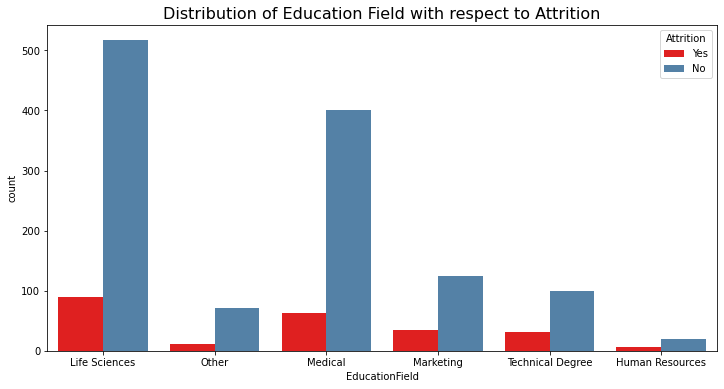

In [51]:
plt.figure(figsize=(12, 6))#plot size
sns.countplot(x="EducationField", hue="Attrition", data=df_1, palette = ["red", "steelblue"])#create countplot
plt.title("Distribution of Education Field with respect to Attrition", size = 16)#title of plot

Distribution of Gender based on Attrition

Text(0.5, 1.0, 'Distribution of Gender with respect to Attrition')

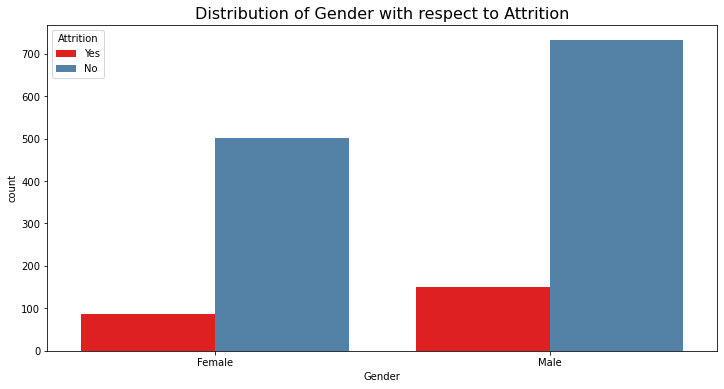

In [52]:
plt.figure(figsize=(12, 6))#plot size
sns.countplot(x="Gender", hue="Attrition", data=df_1, palette = ["red", "steelblue"])#create countplot
plt.title("Distribution of Gender with respect to Attrition", size = 16)#title of plot

Distribution of Hourly Rate based on Attrition

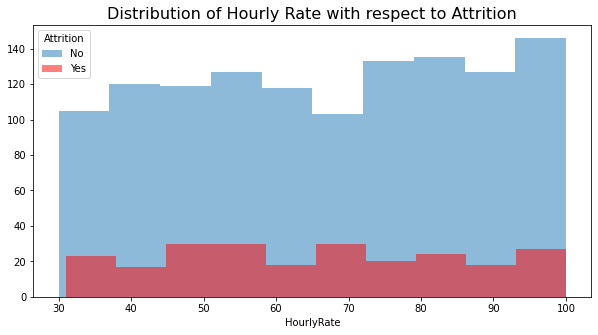

In [53]:
plt.figure(figsize=(10, 5))#plot size
plt.hist("HourlyRate", data = df_1[df_1["Attrition"] == "No"], alpha = 0.5, label = "No")#create histogram
plt.hist("HourlyRate", data = df_1[df_1["Attrition"] == "Yes"], alpha = 0.5, label = "Yes", color = "Red")#create histogram
plt.title("Distribution of Hourly Rate with respect to Attrition", size = 16)#title of plot
plt.xlabel("HourlyRate")
plt.legend(title = "Attrition")
plt.show()

Distribution of Job Involvement based on Attrition

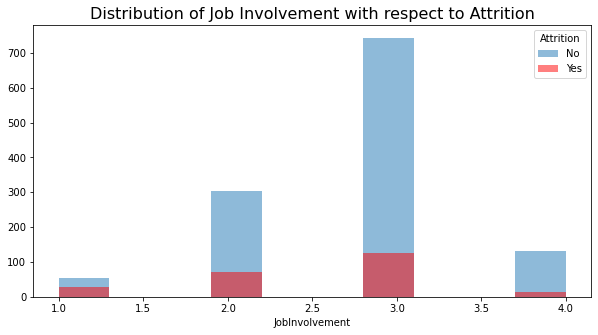

In [54]:
plt.figure(figsize=(10, 5))#plot size
plt.hist("JobInvolvement", data = df_1[df_1["Attrition"] == "No"], alpha = 0.5, label = "No")#create histogram
plt.hist("JobInvolvement", data = df_1[df_1["Attrition"] == "Yes"], alpha = 0.5, label = "Yes", color = "Red")#create histogram
plt.title("Distribution of Job Involvement with respect to Attrition", size = 16)#title of plot
plt.xlabel("JobInvolvement")#x label
plt.legend(title = "Attrition")#title of legend
plt.show()

Distribution of Job Level based on Attrition

Text(0.5, 1.0, 'Distribution of Job Level with respect to Attrition')

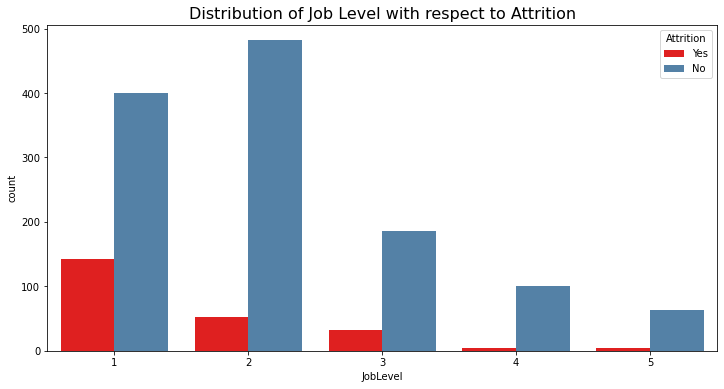

In [55]:
plt.figure(figsize=(12, 6))#plot size
sns.countplot(x="JobLevel", hue="Attrition", data=df_1, palette = ["red", "steelblue"])#create countplot
plt.title("Distribution of Job Level with respect to Attrition", size = 16)#title of countplot

Distribution of Monthly Income based on Attrition

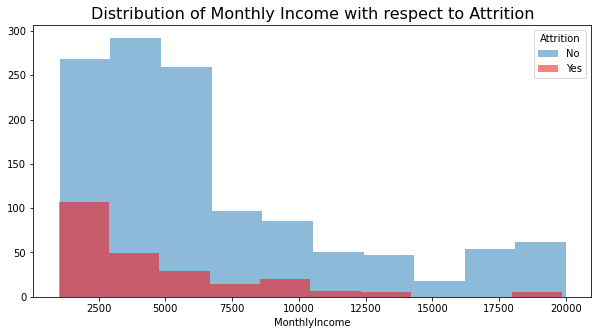

In [56]:
plt.figure(figsize=(10, 5))#plot size
plt.hist("MonthlyIncome", data = df_1[df_1["Attrition"] == "No"], alpha = 0.5, label = "No")#create histogram
plt.hist("MonthlyIncome", data = df_1[df_1["Attrition"] == "Yes"], alpha = 0.5, label = "Yes", color = "Red")#create histogram
plt.title("Distribution of Monthly Income with respect to Attrition", size = 16)#title of plot
plt.xlabel("MonthlyIncome")#x label
plt.legend(title = "Attrition")#title of legend
plt.show()

Distribution of Job Role based on Attrition

Text(0.5, 1.0, 'Distribution of Job Role with respect to Attrition')

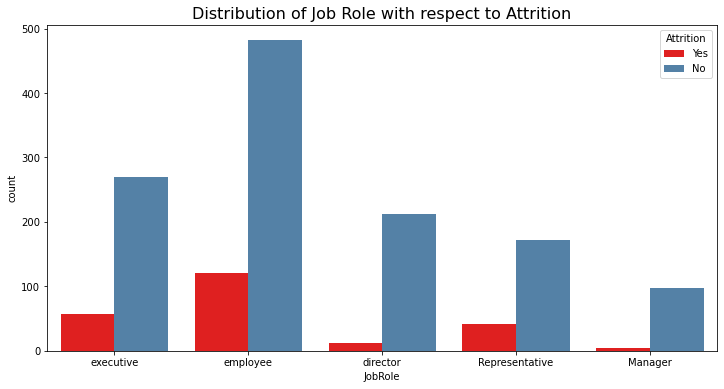

In [57]:
plt.figure(figsize=(12, 6))#plot size
sns.countplot(x="JobRole", hue="Attrition", data=df_1, palette = ["red", "steelblue"])#create countplot
plt.title("Distribution of Job Role with respect to Attrition", size = 16)#title of countplot

Distribution of Marital Status based on Attrition

Text(0.5, 1.0, 'Distribution of Marital Status with respect to Attrition')

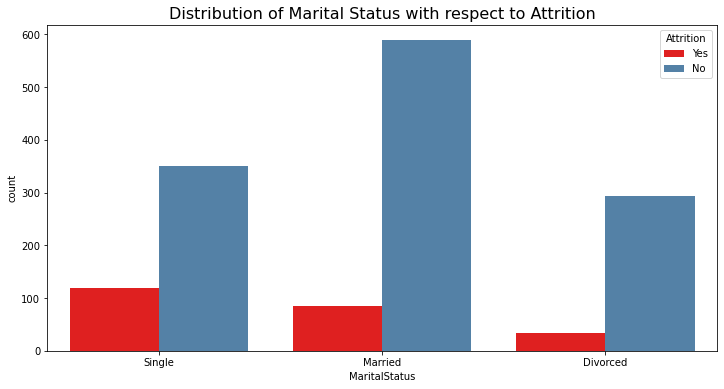

In [58]:
plt.figure(figsize=(12, 6))#plot size
sns.countplot(x="MaritalStatus", hue="Attrition", data=df_1, palette = ["red", "steelblue"])#create countplot
plt.title("Distribution of Marital Status with respect to Attrition", size = 16)#title of plot

Distribution of Percent Salary Hike based on Attrition

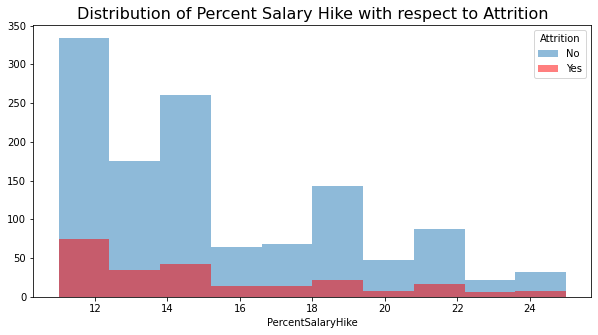

In [59]:
plt.figure(figsize=(10, 5))#plot size
plt.hist("PercentSalaryHike", data = df_1[df_1["Attrition"] == "No"], alpha = 0.5, label = "No")#create histogram
plt.hist("PercentSalaryHike", data = df_1[df_1["Attrition"] == "Yes"], alpha = 0.5, label = "Yes", color = "Red")#create histogram
plt.title("Distribution of Percent Salary Hike with respect to Attrition", size = 16)#title of histogram plot
plt.xlabel("PercentSalaryHike")#x label
plt.legend(title = "Attrition")#title of legend
plt.show()

Distribution of Performance Rating based on Attrition

Text(0.5, 1.0, 'Distribution of Performance Rating with respect to Attrition')

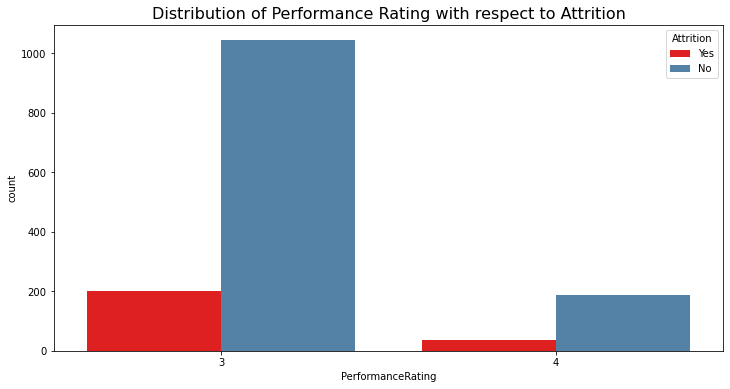

In [60]:
plt.figure(figsize=(12, 6))#plot size
sns.countplot(x="PerformanceRating", hue="Attrition", data=df_1, palette = ["red", "steelblue"])#create countplot
plt.title("Distribution of Performance Rating with respect to Attrition", size = 16)#title of countplot

Distribution of Stock Option Level based on Attrition

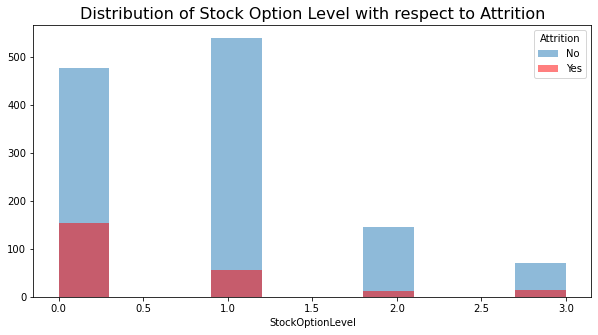

In [61]:
plt.figure(figsize=(10, 5))#plot size
plt.hist("StockOptionLevel", data = df_1[df_1["Attrition"] == "No"], alpha = 0.5, label = "No")#creating histogram plot
plt.hist("StockOptionLevel", data = df_1[df_1["Attrition"] == "Yes"], alpha = 0.5, label = "Yes", color = "Red")#creating histogram plot
plt.title("Distribution of Stock Option Level with respect to Attrition", size = 16)#title of plot
plt.xlabel("StockOptionLevel")#x label title
plt.legend(title = "Attrition")# title of legend
plt.show()

Distribution of Total Working Years based on Attrition

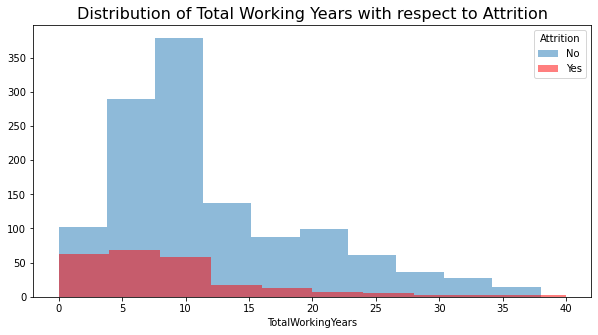

In [62]:
plt.figure(figsize=(10, 5))#plort size
plt.hist("TotalWorkingYears", data = df_1[df_1["Attrition"] == "No"], alpha = 0.5, label = "No")#creating histogram
plt.hist("TotalWorkingYears", data = df_1[df_1["Attrition"] == "Yes"], alpha = 0.5, label = "Yes", color = "Red")#creating histogram
plt.title("Distribution of Total Working Years with respect to Attrition", size = 16)#title of plot
plt.xlabel("TotalWorkingYears")#x label 
plt.legend(title = "Attrition")#title of legend
plt.show()

Distribution of Training Times Last Year based on Attrition

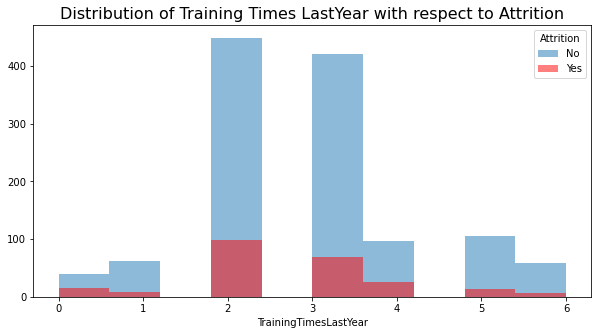

In [63]:
plt.figure(figsize=(10, 5))#plot size
plt.hist("TrainingTimesLastYear", data = df_1[df_1["Attrition"] == "No"], alpha = 0.5, label = "No")#creating histogram
plt.hist("TrainingTimesLastYear", data = df_1[df_1["Attrition"] == "Yes"], alpha = 0.5, label = "Yes", color = "Red")#creating histogram
plt.title("Distribution of Training Times LastYear with respect to Attrition", size = 16)#title of plot
plt.xlabel("TrainingTimesLastYear")#x label
plt.legend(title = "Attrition")#title of legend
plt.show()

Distribution of Years Since Last Promotion based on Attrition

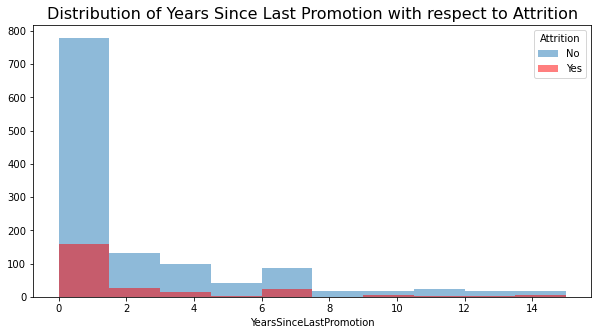

In [64]:
plt.figure(figsize=(10, 5))#plot size
plt.hist("YearsSinceLastPromotion", data = df_1[df_1["Attrition"] == "No"], alpha = 0.5, label = "No")#creating histogram plot
plt.hist("YearsSinceLastPromotion", data = df_1[df_1["Attrition"] == "Yes"], alpha = 0.5, label = "Yes", color = "Red")#creating histogram plot
plt.title("Distribution of Years Since Last Promotion with respect to Attrition", size = 16)#title of plot
plt.xlabel("YearsSinceLastPromotion")#x label
plt.legend(title = "Attrition")#title of legend
plt.show()

Distribution of Work Life Balance based on Attrition

Text(0.5, 1.0, 'Distribution of Work Life Balance with respect to Attrition')

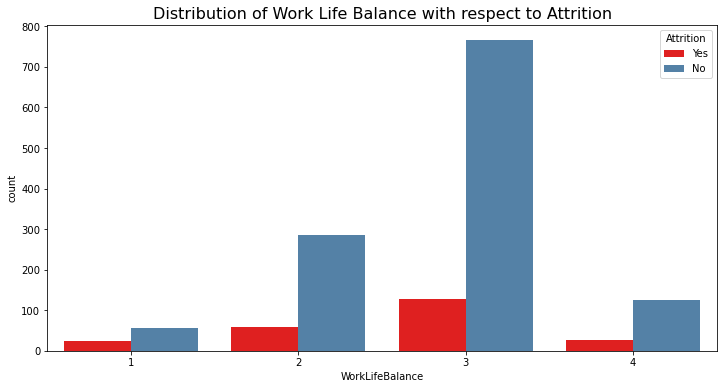

In [65]:
plt.figure(figsize=(12, 6))#plot size
sns.countplot(x="WorkLifeBalance", hue="Attrition", data=df_1, palette = ["red", "steelblue"])#creating countplot
plt.title("Distribution of Work Life Balance with respect to Attrition", size = 16)#title of countplot

Distribution of Number of Companies Worked based on Attrition

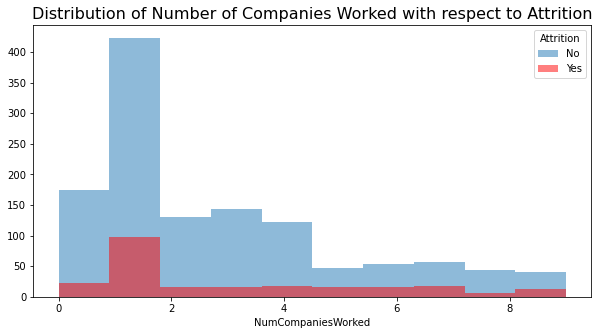

In [66]:
plt.figure(figsize=(10, 5))#plot size
plt.hist("NumCompaniesWorked", data = df_1[df_1["Attrition"] == "No"], alpha = 0.5, label = "No")#create histogram plot
plt.hist("NumCompaniesWorked", data = df_1[df_1["Attrition"] == "Yes"], alpha = 0.5, label = "Yes", color = "Red")#create histogram plot
plt.title("Distribution of Number of Companies Worked with respect to Attrition", size = 16)#title of histogram plot
plt.xlabel("NumCompaniesWorked")#x label
plt.legend(title = "Attrition")#title of legend
plt.show()

Distribution of Years In Current Role based on Attrition

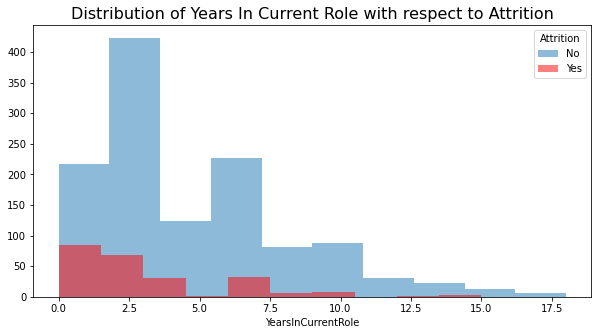

In [67]:
plt.figure(figsize=(10, 5))#plot size
plt.hist("YearsInCurrentRole", data = df_1[df_1["Attrition"] == "No"], alpha = 0.5, label = "No")#create histogram plot
plt.hist("YearsInCurrentRole", data = df_1[df_1["Attrition"] == "Yes"], alpha = 0.5, label = "Yes", color = "Red")#create histogram plot
plt.title("Distribution of Years In Current Role with respect to Attrition", size = 16)#title of plot
plt.xlabel("YearsInCurrentRole")#x label
plt.legend(title = "Attrition")#title of legend
plt.show()

Distribution of Years At Company based on Attrition

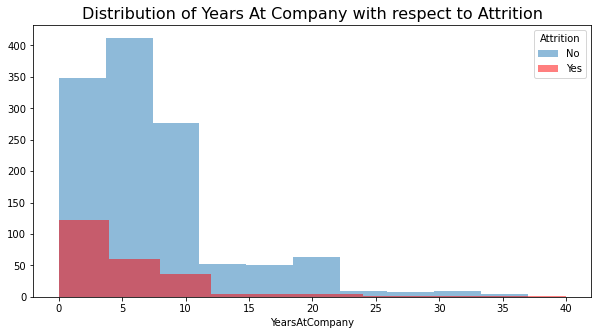

In [68]:
plt.figure(figsize=(10, 5))#plot size
plt.hist("YearsAtCompany", data = df_1[df_1["Attrition"] == "No"], alpha = 0.5, label = "No")#create plot
plt.hist("YearsAtCompany", data = df_1[df_1["Attrition"] == "Yes"], alpha = 0.5, label = "Yes", color = "Red")#create plot
plt.title("Distribution of Years At Company with respect to Attrition", size = 16)#title of plot
plt.xlabel("YearsAtCompany")#x label
plt.legend(title = "Attrition")#title of legend
plt.show()

# 4.0  **Questions**

**Question 1: What do you think are the 3 factors behind employee attrition?**

 Distribution of Job Level based on Attrition   

Text(0.5, 1.0, 'Distribution of Job Level with respect to Attrition')

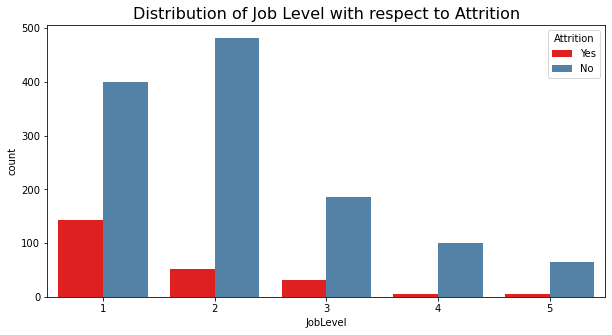

In [69]:
plt.figure(figsize=(10, 5))#plot size
sns.countplot(x="JobLevel", hue="Attrition", data=df_1, palette = ["red", "steelblue"])#create plot
plt.title("Distribution of Job Level with respect to Attrition", size = 16)#title of plot

Distribution of Monthly Income based on Attrition

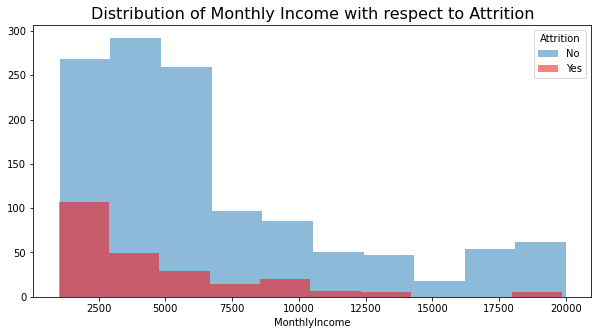

In [70]:
plt.figure(figsize=(10, 5))#size of the plot
plt.hist("MonthlyIncome", data = df_1[df_1["Attrition"] == "No"], alpha = 0.5, label = "No")#histogram plot
plt.hist("MonthlyIncome", data = df_1[df_1["Attrition"] == "Yes"], alpha = 0.5, label = "Yes", color = "Red")#histogram plot
plt.title("Distribution of Monthly Income with respect to Attrition", size = 16)#title of the plot
plt.xlabel("MonthlyIncome")#plot label
plt.legend(title = "Attrition")#name of legend
plt.show()# plots the histogram

Distribution of Stock Option Level based on Attrition

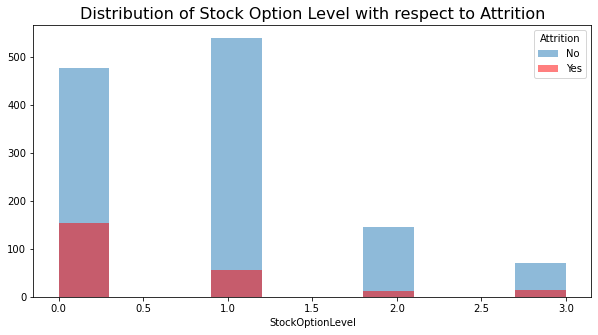

In [71]:
plt.figure(figsize=(10, 5))#size of the plot
plt.hist("StockOptionLevel", data = df_1[df_1["Attrition"] == "No"], alpha = 0.5, label = "No")#histogram plot
plt.hist("StockOptionLevel", data = df_1[df_1["Attrition"] == "Yes"], alpha = 0.5, label = "Yes", color = "Red")#histogram plot
plt.title("Distribution of Stock Option Level with respect to Attrition", size = 16)#title of the plot
plt.xlabel("StockOptionLevel")#plot label
plt.legend(title = "Attrition")#name of legend
plt.show()# plots the histogram

**Question 2: What is the relationship between Education and Monthly Income?**

<AxesSubplot:title={'center':'Relationship between Education and Monthly Income using Attrition Employee'}, xlabel='Education', ylabel='MonthlyIncome'>

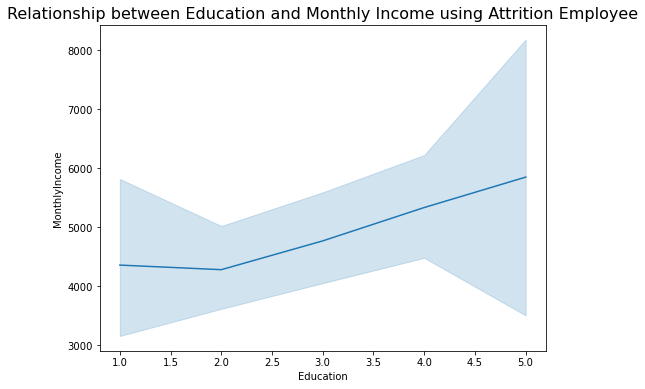

In [72]:
#this shows the relation between eduation and monthly income for employees who leave the organisation
attrition_employee = df_1.query("Attrition == 'Yes'")
plt.figure(figsize = (8, 6)) #size of the plot
plt.title("Relationship between Education and Monthly Income using Attrition Employee", size = 16)#title of the plot
sns.lineplot(data=attrition_employee, x="Education", y="MonthlyIncome") #plots the lineplot

<AxesSubplot:title={'center':'Relationship between Education and Monthly Income using Non-Attrition Employee'}, xlabel='Education', ylabel='MonthlyIncome'>

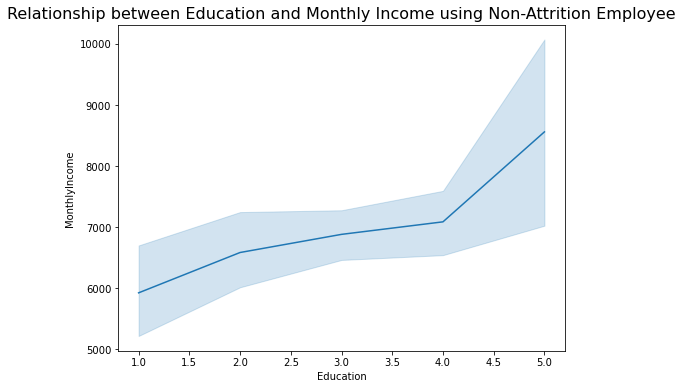

In [73]:
#this shows the relation between eduation and monthly income for employees who stay in the organisation
non_attrition_employee = df_1.query("Attrition == 'No'")
plt.figure(figsize = (8, 6)) #size of the plot
plt.title("Relationship between Education and Monthly Income using Non-Attrition Employee", size = 16)#title of the plot
sns.lineplot(data=non_attrition_employee, x="Education", y="MonthlyIncome")#plots the lineplot

**Question 3: What is the effect of age on attrition?**

<AxesSubplot:xlabel='Age', ylabel='count'>

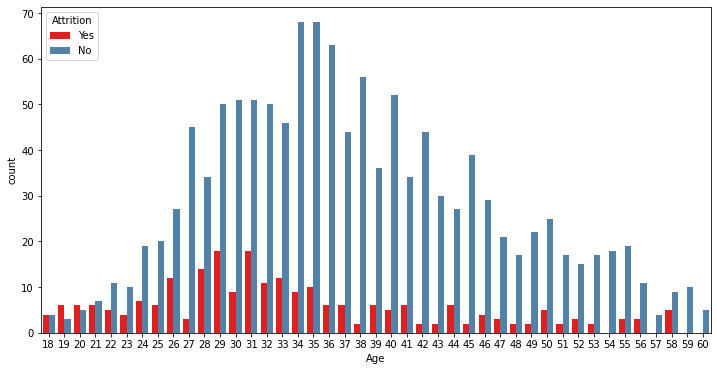

In [74]:
plt.figure(figsize=(12, 6))#plot size
sns.countplot(x="Age", hue="Attrition", data=df_1, palette = ["red", "steelblue"])#create plot

**Question 4: Is Income the main factor in employee attrition?**

Distribution of Monthly Income based on Attrition

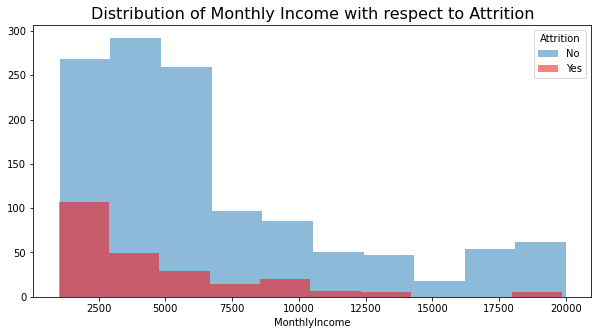

In [75]:
plt.figure(figsize=(10, 5))#size of the plot
plt.hist("MonthlyIncome", data = df_1[df_1["Attrition"] == "No"], alpha = 0.5, label = "No")#histogram plot
plt.hist("MonthlyIncome", data = df_1[df_1["Attrition"] == "Yes"], alpha = 0.5, label = "Yes", color = "Red")#histogram plot
plt.title("Distribution of Monthly Income with respect to Attrition", size = 16)#title of the plot
plt.xlabel("MonthlyIncome")#plot label
plt.legend(title = "Attrition")#name of legend
plt.show()# plots the histogram

**Question 5: How does work-life balance impact the overall attrition rate?**

Distribution of Work Life Balance based on Attrition

Text(0.5, 1.0, 'Distribution of Work Life Balance with respect to Attrition')

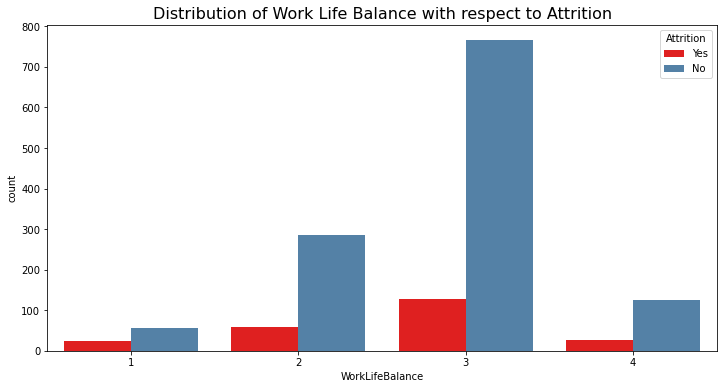

In [76]:
plt.figure(figsize=(12, 6))#plot size
sns.countplot(x="WorkLifeBalance", hue="Attrition", data=df_1, palette = ["red", "steelblue"])#create plot
plt.title("Distribution of Work Life Balance with respect to Attrition", size = 16)#title of plot